In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = 'thegioididong.csv'
exportname = 'tgdd_trans.csv'

In [3]:
df = pd.read_csv(filename).T
df_month = pd.DataFrame(df[5:][0])
df_month.columns = ['Visit']
df_month.head()

,Visit
2016-12,14284884
2017-01,14284884
2017-02,14284884
2017-03,15786887
2017-04,16048763


In [4]:
df_use = df_month
df_use.index = pd.to_datetime(df_use.index, format='%Y-%m')
df_use.head()

,Visit
2016-12-01,14284884
2017-01-01,14284884
2017-02-01,14284884
2017-03-01,15786887
2017-04-01,16048763


In [5]:
buy_month = {
    1: 8,
    2: 7,
    3: 7,
    4: 8,
    5: 9,
    6: 8,
    7: 8,
    8: 7,
    9: 7,
    10: 7,
    11: 12,
    12: 11
}
mul = np.vectorize(buy_month.get)(df_use.index.month) 

In [6]:
df_use['Visit'] = (df_use['Visit'] * (0.76 + mul/40)).astype('int')
df_use['Visit']

2016-12-01    14784854
2017-01-01    13713488
2017-02-01    13356366
2017-03-01    14760739
2017-04-01    15406812
2017-05-01    18072209
2017-06-01    17972140
2017-07-01    17884303
2017-08-01    18629705
2017-09-01    17244018
2017-10-01    17358907
2017-11-01    19523625
2017-12-01    14220654
2018-01-01    13575936
2018-02-01    14086926
2018-03-01    12465562
2018-04-01    12644320
2018-05-01    12751189
2018-06-01    12308608
2018-07-01    12308608
2018-08-01    12424063
2018-09-01    11517401
2018-10-01    11610927
2018-11-01    13172031
2018-12-01    13029276
2019-01-01    12082431
2019-02-01    12127661
2019-03-01    10875847
2019-04-01    11638932
2019-05-01    11705850
2019-06-01    12311591
2019-07-01    12765257
2019-08-01    12007525
2019-09-01    11848637
2019-10-01    13243871
2019-11-01    16863965
2019-12-01    21784253
2020-01-01    21974516
2020-02-01    22622020
2020-03-01    22708585
2020-04-01    24357102
2020-05-01    24705018
2020-06-01    24460572
2020-07-01 

In [7]:
df_use['Visit per day'] = df_use['Visit'] / df_use.index.days_in_month
df_use.head()

,Visit,Visit per day
2016-12-01,14784854,476930.774194
2017-01-01,13713488,442370.580645
2017-02-01,13356366,477013.071429
2017-03-01,14760739,476152.870968
2017-04-01,15406812,513560.400000


In [8]:
df_use.loc[pd.Timestamp("2021-10-01"), 'Visit'] = 0
df_use.head()

,Visit,Visit per day
2016-12-01,14784854.0,476930.774194
2017-01-01,13713488.0,442370.580645
2017-02-01,13356366.0,477013.071429
2017-03-01,14760739.0,476152.870968
2017-04-01,15406812.0,513560.400000


In [9]:
df_use.index

DatetimeIndex(['2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
      

In [10]:
df_use = df_use.resample('D', convention='end').asfreq()
df_use

,Visit,Visit per day
2016-12-01,14784854.0,476930.774194
2016-12-02,NaN,NaN
2016-12-03,NaN,NaN
2016-12-04,NaN,NaN
2016-12-05,NaN,NaN
...,...,...
2021-09-27,NaN,NaN
2021-09-28,NaN,NaN
2021-09-29,NaN,NaN
2021-09-30,NaN,NaN


In [11]:
df_use['Visit'] = df_use['Visit'].astype(float)
df_use['Visit per day'] = df_use['Visit per day'].astype(float)
df_use.describe()

,Visit,Visit per day
count,5.900000e+01,5.800000e+01
mean,1.850146e+07,6.187145e+05
std,7.277985e+06,2.271883e+05
min,0.000000e+00,3.508338e+05
25%,1.255494e+07,4.139117e+05
50%,1.686396e+07,5.610485e+05
75%,2.495999e+07,8.148608e+05
max,3.505234e+07,1.168411e+06


In [12]:
df_inter_time = df_use.interpolate(method='time')
df_inter_time

,Visit,Visit per day
2016-12-01,1.478485e+07,4.769308e+05
2016-12-02,1.475029e+07,4.758159e+05
2016-12-03,1.471573e+07,4.747011e+05
2016-12-04,1.468117e+07,4.735862e+05
2016-12-05,1.464661e+07,4.724714e+05
...,...,...
2021-09-27,4.673645e+06,1.168411e+06
2021-09-28,3.505234e+06,1.168411e+06
2021-09-29,2.336822e+06,1.168411e+06
2021-09-30,1.168411e+06,1.168411e+06


<AxesSubplot:>

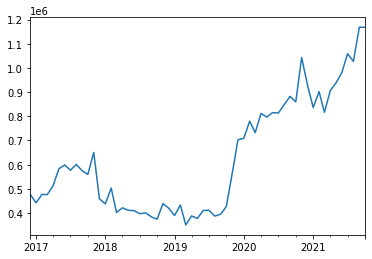

In [13]:
df_inter_time['Visit per day'].plot()

In [14]:
day = df_inter_time.index.day
month = df_inter_time.index.month
day_sub = 15 ** 2 - (15 - day) ** 2
day_sub

Int64Index([ 29,  56,  81, 104, 125, 144, 161, 176, 189, 200,
            ...
            176, 161, 144, 125, 104,  81,  56,  29,   0,  29],
           dtype='int64', length=1766)

In [15]:
day_of_week = df_inter_time.index.day_of_week.values

In [16]:
buy_dow = {
    0: 14,
    1: 14,
    2: 15,
    3: 15,
    4: 15,
    5: 13,
    6: 14
}

In [17]:
dow_bonus = np.vectorize(buy_dow.get)(day_of_week)
dow_bonus

array([15, 15, 13, ..., 15, 15, 15])

In [18]:
# Adding noise
noise = 100 + np.random.randn(df_use.shape[0]) * 4 + (day_sub / 60) + dow_bonus * 1.2
noise

Float64Index([118.86250333951347,  124.0080764289642, 114.83504458799075,
              116.35538934672066, 123.81418604184286, 117.74404034792546,
              130.10872051965427, 115.12902340022444, 120.26877544129741,
               118.0640867505227,
              ...
              113.98280719309986, 118.79322997016003, 118.68687973141753,
              114.74369151284219, 121.53663298942374,  124.6702069634472,
              116.86916182853601, 127.81178622703735, 125.64344508023638,
              120.94478226343558],
             dtype='float64', length=1766)

<AxesSubplot:>

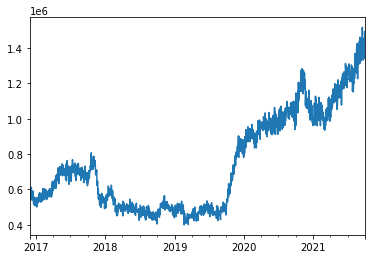

In [19]:
df_noise = df_inter_time['Visit per day'] * noise / 100
df_noise.plot()

In [20]:
df_noise.resample('M').sum()[:-1]

2016-12-31    1.705880e+07
2017-01-31    1.684053e+07
2017-02-28    1.604050e+07
2017-03-31    1.816503e+07
2017-04-30    1.953124e+07
2017-05-31    2.176666e+07
2017-06-30    2.111397e+07
2017-07-31    2.189579e+07
2017-08-31    2.177051e+07
2017-09-30    2.020110e+07
2017-10-31    2.242548e+07
2017-11-30    2.006319e+07
2017-12-31    1.664669e+07
2018-01-31    1.751665e+07
2018-02-28    1.519328e+07
2018-03-31    1.520216e+07
2018-04-30    1.481857e+07
2018-05-31    1.537835e+07
2018-06-30    1.444840e+07
2018-07-31    1.472442e+07
2018-08-31    1.461368e+07
2018-09-30    1.343142e+07
2018-10-31    1.501637e+07
2018-11-30    1.547836e+07
2018-12-31    1.496823e+07
2019-01-31    1.522109e+07
2019-02-28    1.306740e+07
2019-03-31    1.356032e+07
2019-04-30    1.367950e+07
2019-05-31    1.472556e+07
2019-06-30    1.478289e+07
2019-07-31    1.486359e+07
2019-08-31    1.455171e+07
2019-09-30    1.472196e+07
2019-10-31    1.834431e+07
2019-11-30    2.258443e+07
2019-12-31    2.622710e+07
2

In [21]:
df_month['Visit'].astype(float).to_numpy()

array([14784854., 13713488., 13356366., 14760739., 15406812., 18072209.,
       17972140., 17884303., 18629705., 17244018., 17358907., 19523625.,
       14220654., 13575936., 14086926., 12465562., 12644320., 12751189.,
       12308608., 12308608., 12424063., 11517401., 11610927., 13172031.,
       13029276., 12082431., 12127661., 10875847., 11638932., 11705850.,
       12311591., 12765257., 12007525., 11848637., 13243871., 16863965.,
       21784253., 21974516., 22622020., 22708585., 24357102., 24705018.,
       24460572., 25214963., 26273904., 26477368., 26652846., 31279183.,
       28856734., 25932492., 25258751., 25322186., 27188236., 29071619.,
       29429409., 32820455., 31849100., 35052336.,        0.])

In [22]:
df_noise.resample('M').sum().to_numpy()

array([17058798.99796129, 16840528.12365533, 16040496.34436795,
       18165026.08111873, 19531236.76996717, 21766660.74742557,
       21113967.66977941, 21895794.01271827, 21770513.66811896,
       20201095.79761007, 22425479.83755069, 20063187.555441  ,
       16646692.83526222, 17516653.52583869, 15193279.43288499,
       15202162.23344447, 14818570.73374178, 15378347.48798146,
       14448401.46836141, 14724418.88024268, 14613680.27045885,
       13431419.24164358, 15016374.16035036, 15478356.43992676,
       14968232.55838836, 15221086.49816176, 13067400.76766115,
       13560319.77931795, 13679504.3482438 , 14725561.98163568,
       14782891.49996675, 14863585.69849185, 14551706.47542897,
       14721963.78514217, 18344311.79101804, 22584427.10953419,
       26227101.78973696, 27291156.85996478, 26221006.99183524,
       28775577.47716964, 29063740.89287996, 29901848.58083441,
       29314806.44587277, 30911220.15173229, 32072798.90409746,
       31351291.63822509, 35260180.42963

In [23]:
df_month['proportion'] = df_month['Visit'].astype(float).to_numpy() / df_noise.resample('M').sum().to_numpy()
df_month

,Visit,Visit per day,proportion
2016-12-01,14784854.0,4.769308e+05,0.866700
2017-01-01,13713488.0,4.423706e+05,0.814315
2017-02-01,13356366.0,4.770131e+05,0.832665
2017-03-01,14760739.0,4.761529e+05,0.812591
2017-04-01,15406812.0,5.135604e+05,0.788829
2017-05-01,18072209.0,5.829745e+05,0.830270
2017-06-01,17972140.0,5.990713e+05,0.851197
2017-07-01,17884303.0,5.769130e+05,0.816792
2017-08-01,18629705.0,6.009582e+05,0.855731
2017-09-01,17244018.0,5.748006e+05,0.853618


In [24]:
df_normal = (df_noise * df_month.resample('D', convention='end').asfreq()['proportion'].fillna(method='ffill')).astype(int)

<AxesSubplot:>

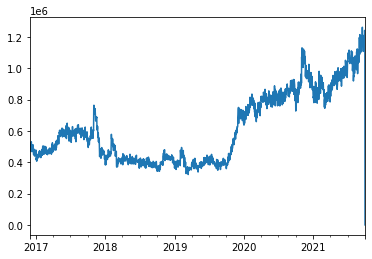

In [25]:
df_normal.plot()

In [26]:
df_normal[:-1].to_csv(exportname, header=['Visited'])